In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import community
%matplotlib inline

In [2]:
gg_data = pd.read_csv('adata_24dec.csv')

In [3]:
gg_data.head()

,user_id,account_status,friend_id,name,account_status.1
0,12,active,13,Ekaparnika Abbott,ghost
1,12,active,14,Ekaparnika Abbott,ghost
2,12,active,15,Bala Nair,ghost
3,12,active,16,Bala Nair,ghost
4,12,active,17,Bala Nair,ghost


In [4]:
result = gg_data.sort_values(by=['friend_id'])

In [5]:
node_list = set(gg_data['user_id'].values.tolist())

In [6]:
edge_array = gg_data[['user_id','friend_id']].values
edge_tuple = tuple(map(tuple, edge_array))

In [7]:
Graph = nx.Graph()

In [8]:
Graph.add_edges_from(edge_tuple)


In [9]:
node_attr = {}
for index, row in gg_data.iterrows():
    node_attr[row['user_id']] = {'status': row['account_status']}
    node_attr[row['friend_id']] = {'status': row['account_status.1']}

In [10]:
nx.set_node_attributes(Graph, node_attr)

{11L: {'status': 'active'},
 12L: {'status': 'active'},
 13L: {'status': 'ghost'},
 14L: {'status': 'ghost'},
 15L: {'status': 'ghost'},
 16L: {'status': 'ghost'},
 17L: {'status': 'ghost'},
 18L: {'status': 'ghost'},
 19L: {'status': 'ghost'},
 20L: {'status': 'ghost'},
 21L: {'status': 'ghost'},
 22L: {'status': 'ghost'},
 23L: {'status': 'ghost'},
 24L: {'status': 'ghost'},
 25L: {'status': 'ghost'},
 26L: {'status': 'ghost'},
 27L: {'status': 'ghost'},
 28L: {'status': 'ghost'},
 29L: {'status': 'ghost'},
 30L: {'status': 'ghost'},
 31L: {'status': 'ghost'},
 32L: {'status': 'ghost'},
 33L: {'status': 'ghost'},
 34L: {'status': 'ghost'},
 35L: {'status': 'ghost'},
 36L: {'status': 'ghost'},
 37L: {'status': 'ghost'},
 38L: {'status': 'ghost'},
 39L: {'status': 'ghost'},
 40L: {'status': 'ghost'},
 41L: {'status': 'ghost'},
 42L: {'status': 'ghost'},
 43L: {'status': 'ghost'},
 44L: {'status': 'ghost'},
 45L: {'status': 'ghost'},
 46L: {'status': 'ghost'},
 47L: {'status': 'ghost'},

In [11]:
print nx.info(Graph)

Name: 
Type: Graph
Number of nodes: 94277
Number of edges: 99206
Average degree:   2.1046


In [12]:
remove = [node for node,degree in Graph.degree() if degree < 2]

In [13]:
Graph.remove_nodes_from(remove)

In [14]:
remove_0 = [node for node,degree in Graph.degree() if degree < 1]

In [15]:
Graph.remove_nodes_from(remove_0)

In [16]:
clipped_adj_matrix = nx.adjacency_matrix(Graph)
print nx.info(Graph)

Name: 
Type: Graph
Number of nodes: 2684
Number of edges: 7669
Average degree:   5.7146


In [17]:
active_nodes = [n for (n,s) in nx.get_node_attributes(Graph,'status').iteritems() if s == 'active']
ghost_nodes = [n for (n,s) in  nx.get_node_attributes(Graph,'status').iteritems() if s == 'ghost']

In [18]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(Graph)

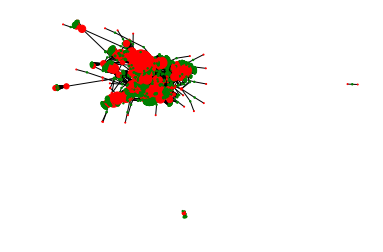

In [19]:
plt.axis("off")
d=dict(nx.degree(Graph))
#nx.draw_networkx_nodes(Graph, pos = spring_pos, nodelist=active_nodes, node_color='red', node_size=15, with_labels = False)
#nx.draw_networkx_nodes(Graph, pos = spring_pos, nodelist=ghost_nodes, node_color='green', node_size =15, with_labels = False)
nx.draw_networkx(Graph, pos = spring_pos, nodelist=d.keys(), node_color = ['green' if Graph.node[n]['status'] == 'ghost' else 'red' for n in d.keys()], with_labels = False, node_size=[v for v in d.values()])

In [20]:
parts = community.best_partition(Graph)
values = [parts.get(node) for node in Graph.nodes()]

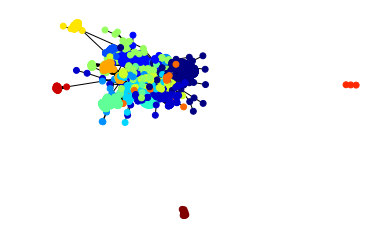

In [21]:
plt.axis("off")
nx.draw_networkx(Graph, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)

In [23]:
bc_value = nx.betweenness_centrality(Graph, endpoints=True)

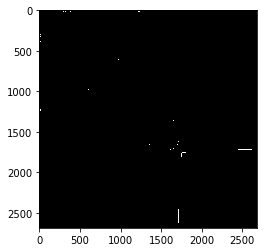

In [22]:
plt.imshow(clipped_adj_matrix.todense(),cmap='gray')

In [73]:
import operator
sorted_bc_val = sorted(bc_value.items(), key=operator.itemgetter(1), reverse=True)

In [74]:
sorted_bc_val = [list(l) for l in sorted_bc_val]

In [75]:
for l in sorted_bc_val:
    l.append(node_attr[l[0]]['status'])

In [83]:
import csv
with open('user_list.csv', 'wb') as myfile:
    wr = csv.writer(myfile)
    for l in sorted_bc_val:
        wr.writerow(l)
myfile.close()